# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

- Create visualizations using Python libraries
- Understand the data and its features

## Inputs

- Dataset: `cardio_data_with_diabetes_risk_clean.csv`

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk'

---

## Load necessary libraries

Section 2 content

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Load cleaned dataset for basic visualizations

In [6]:
path = 'dataset/cleaned/cardio_data_with_diabetes_risk_clean.csv'
df = pd.read_csv(path)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,...,age_group,bmi_category,age_simp_group,bmi_simp_cat,diab_risk_percent,diab_risk_cat,age_group_num,bmi_category_num,bp_category_num,diab_risk_cat_num
0,2,168,4.127134,110,80,1,1,0,0,1,...,50-59,Normal,Middle-aged,Low BMI,16.15,Low Risk,3,1,2,0
1,1,156,4.442651,140,90,3,1,0,0,1,...,50-59,Obese I,Middle-aged,Mid BMI,57.50,High Risk,3,3,3,2
2,1,165,4.158883,130,70,3,1,0,0,0,...,50-59,Normal,Middle-aged,Low BMI,18.21,Low Risk,3,1,2,0
3,2,169,4.406719,150,100,1,1,0,0,1,...,40-49,Overweight,Middle-aged,Mid BMI,19.62,Low Risk,2,2,3,0
4,1,156,4.025352,100,60,1,1,0,0,0,...,40-49,Normal,Middle-aged,Low BMI,9.76,Low Risk,2,1,0,0


## Visualization of some categorical features (those are in binary format) and how they relate to the target variable (diabetes risk)

### I am using `diab_risk_cat` as the target target variable, which is a simplified version of the original `diab_risk_percent` column in order to make the visualization easier to interpret

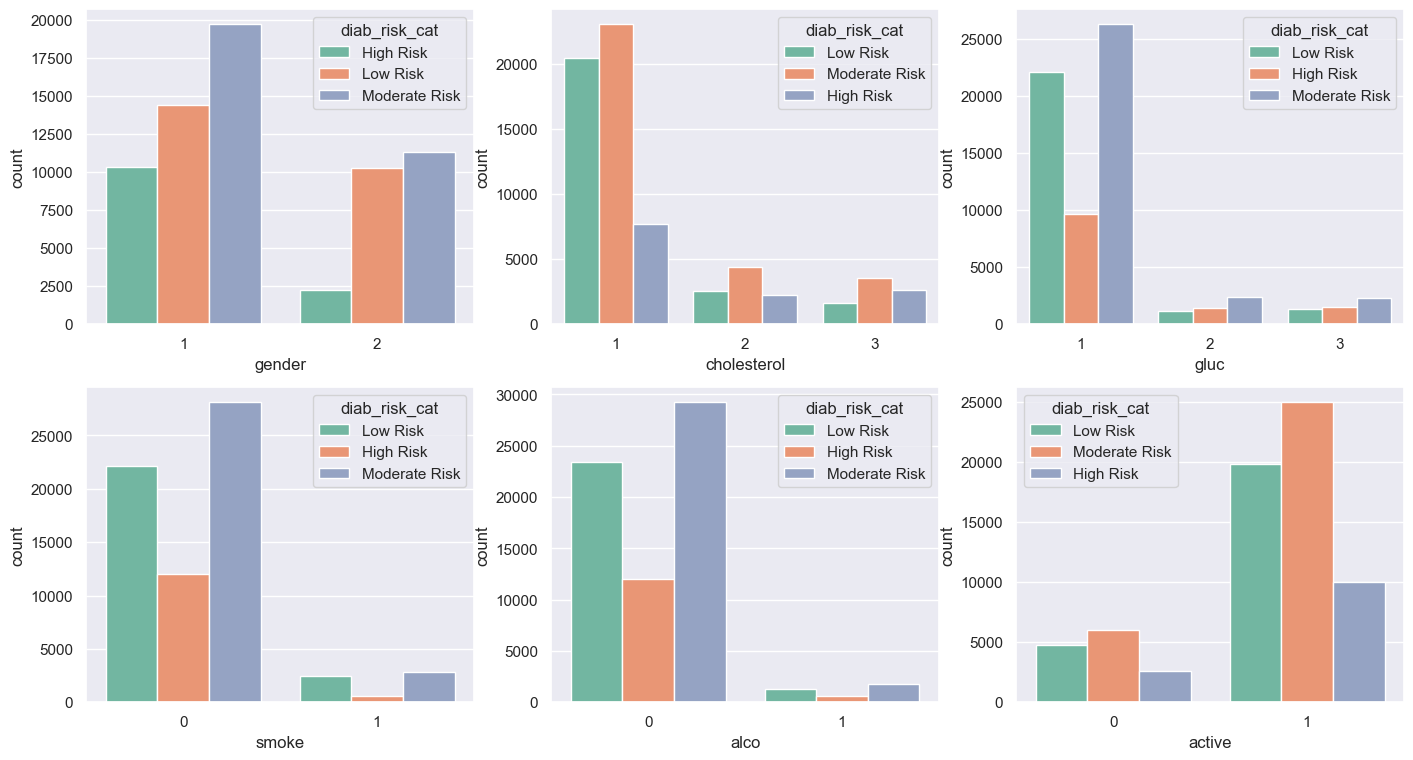

In [7]:
# Visualizing the categorical variables in the dataset
sns.set_theme(palette="Set2")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,9))
sns.countplot(data=df, x='gender', hue='diab_risk_cat', ax=axes[0,0])
sns.countplot(data=df, x='cholesterol', hue='diab_risk_cat',ax=axes[0,1])
sns.countplot(data=df, x='gluc', hue='diab_risk_cat', ax=axes[0,2])
sns.countplot(data=df, x='smoke', hue='diab_risk_cat', ax=axes[1,0])
sns.countplot(data=df, x='alco', hue='diab_risk_cat', ax=axes[1,1])
sns.countplot(data=df, x='active', hue='diab_risk_cat', ax=axes[1,2])
plt.show()

My primary focus here to see how the plot looks like for `gender` and `active` features against the target variable `diab_risk_cat`.

As I can see, the `gender` feature has a significant impact on the target variable, with a higher percentage of `Female` patients in the high-risk category compared to `Male` patients. This suggests that gender may play a role in diabetes risk. So, I will use the Pie Chart to visualize the data distribution of `gender` in the dataset.

From the `active` feature, I can see that there is a significant difference in the percentage of patients who are active and those who are not. This suggests that physical activity may have an impact on diabetes risk. So, I will use the Pie Chart to visualize the data distribution of `active` in the dataset.

### I am using Plotly Pie chart to visualize the data distribution of `gender` and `active` columns in the dataset

**Gender column:**

    - `1`: Female
    - `2`: Male

**Active column:**

    - `0`: Not physically active
    - `1`: Physically active

In [8]:
for i in ['gender', 'active']:
    fig = px.pie(df, values=df[i].value_counts(normalize=True), 
                 names=df[i].value_counts().index,
                 color_discrete_sequence=px.colors.sequential.Aggrnyl,
                 title=f'Distribution of {i} in the dataset')
    fig.show()

As we can see from the pie chart, the dataset has a higher percentage of `Female` patients compared to `Male` patients. Additionally, there is a significant portion of the population that is `Physically active` compared to those who are `Not physically active`.

Gender improportion is 1:2, which means there are twice as many `Male` patients as there are `Female` patients. From the general correlation analysis, I see that there is a ***-0.184671*** correlation between `gender` and `diabetes_risk_percentage`, indicating that as the percentage of `Male` patients increases, the diabetes risk percentage tends to decrease slightly. During the hypothesis testing, I will check the `p-value` if null hypothesis is True.

Regarding the `active` column, it can be easily identified that the proportion of physically active patients are almost 4 times higher than those who are not physically active. This is a significant difference. I see from the general correlation analysis that there is a ***-0.014880*** correlation between `active` and `diabetes_risk_percentage`, indicating that there is a very weak negative correlation between physical activity and diabetes risk percentage. This suggests that being physically active does not have a significant impact on reducing diabetes risk in this dataset. However, this seems strange, as physical activity is generally known to reduce the risk of diabetes. Therefore, I will perform a `AB Test` to confirm this finding. Additionally, I will further investigate this relationship during the hypothesis testing phase to see if null hypothesis is True or not.

### I am using Seaborn Boxplot and Histogram to visualize relationship between `diab_risk_cat` and `bmi`

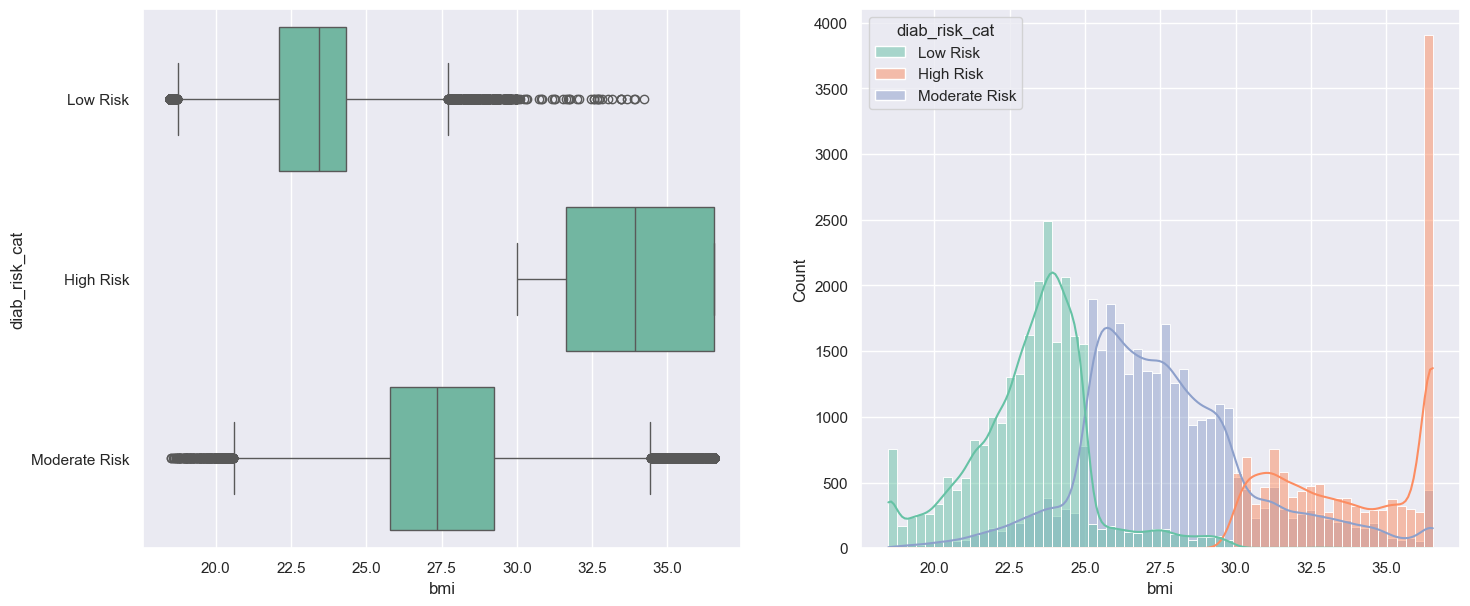

In [9]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(17,7))
sns.boxplot(data=df, x='bmi', y='diab_risk_cat', ax=axis[0])
sns.histplot(data=df, x='bmi', hue='diab_risk_cat', ax=axis[1], kde=True)
plt.show()

**Key Insights**

***Key Patterns:***
1. BMI Increases with Risk:
    - Median BMI rises as risk level increases.
    - Clear stratification: Low (<27), Moderate (25–30), High (>30).
2. Overlap Exists:
    - Some overlap in BMI values between risk categories—particularly between Low and Moderate.
    - However, High Risk shows minimal overlap with Low Risk—suggesting BMI is a strong indicator at the extremes.
3. Outliers Matter:
    - Outliers in Low and Moderate Risk groups indicate that other factors (e.g., age, family history, blood sugar) likely influence risk beyond BMI alone.

**Summarization**

| Risk Category     | Median BMI | BMI Range (approx.)  | Shape of Distribution  | Key Insight                               |
| ----------------- | ---------- | -------------------- | ---------------------- | ----------------------------------------- |
| **Low Risk**      | \~24       | 19–30 (outliers >30) | Skewed right           | Most have BMI <27                         |
| **Moderate Risk** | \~27       | 19–37                | Broad, symmetrical     | Wide variability, overlaps with both ends |
| **High Risk**     | \~32       | 30–37+               | Sharp peak at high BMI | Most have BMI ≥30                         |

**Conclusion**

- BMI is positively associated with diabetes risk: higher BMI strongly correlates with higher risk.
- Risk stratification by BMI is clear, especially at the extremes.
- There is some overlap, suggesting that while BMI is influential, it's not the sole determinant—other clinical or genetic variables likely play a role.
- This kind of visualization is excellent for identifying BMI thresholds to inform preventive screening and early intervention strategies.


### I am using Stacked Bar Chart to visualize the probability of `diab_risk_cat` over `gender` and `age_simp_group` columns in the dataset.

<Axes: xlabel='gender,age_simp_group'>

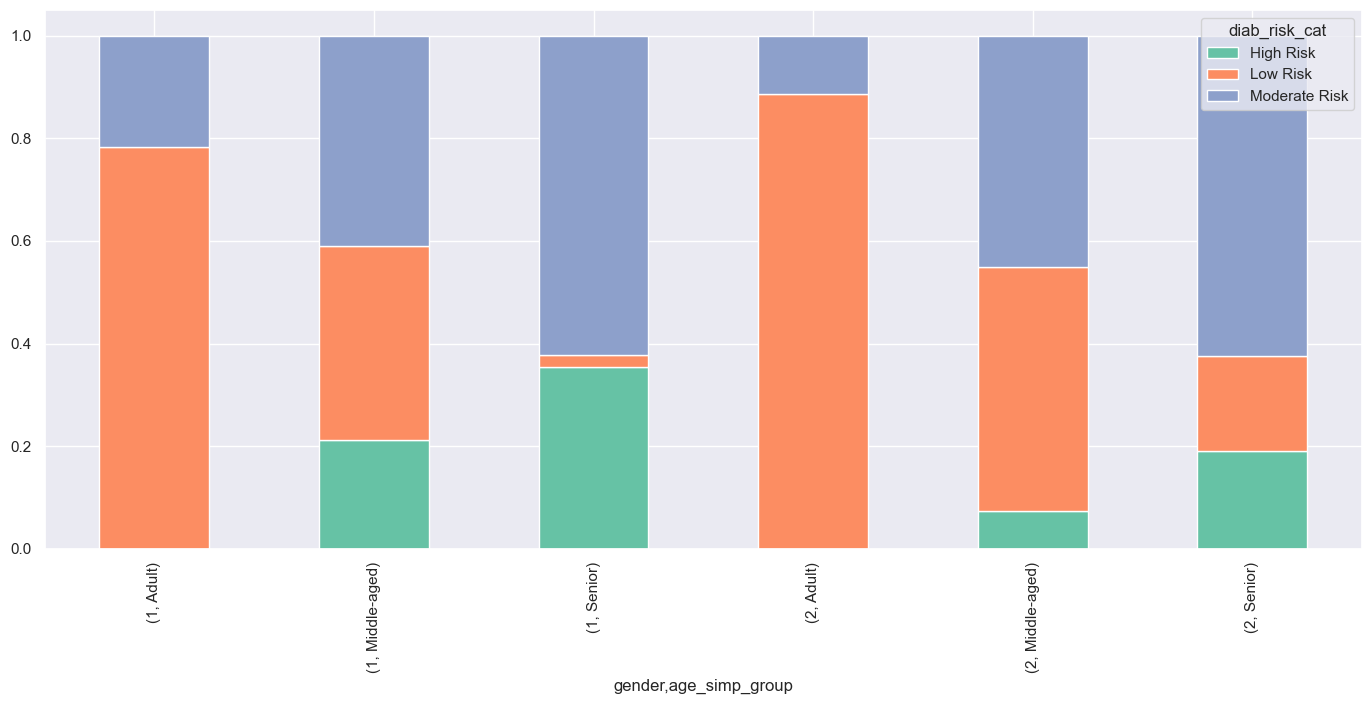

In [10]:
df.groupby(['gender', 'age_simp_group'])['diab_risk_cat'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(17, 7))

**Key Insights**

👩‍⚕️ ***Females:***

- Start off very healthy in early adulthood.
- Experience a steeper increase in High Risk with age compared to males.
- Senior females show the highest proportion of High Risk (~33%), and very few Low Risk individuals.

👨‍⚕️ ***Males:***

- Adult males are also mostly Low Risk (~90%).
- Risk rises more gradually with age.
- Senior males have a more balanced distribution, with less High Risk and more Low Risk compared to senior females.

**Summarization**

| Group                   | High Risk | Moderate Risk | Low Risk | Notes                                        |
| ----------------------- | --------- | ------------- | -------- | -------------------------------------------- |
| **Female, Adult**       | \~0%      | \~22%         | \~78%    | Healthiest female group                      |
| **Female, Middle-aged** | \~21%     | \~42%         | \~37%    | Risk increasing noticeably                   |
| **Female, Senior**      | \~33%     | \~63%         | \~4%     | Highest risk group overall                   |
| **Male, Adult**         | \~0%      | \~10%         | \~90%    | Healthiest male group                        |
| **Male, Middle-aged**   | \~9%      | \~44%         | \~47%    | Risk rising moderately                       |
| **Male, Senior**        | \~19%     | \~54%         | \~27%    | Risk increased, but less than senior females |

**Conclusion**

- Both gender and age play critical roles in diabetes risk.
- Females experience a sharper increase in diabetes risk as they age, especially in the senior group.
- Senior women are the most vulnerable, with two-thirds in the Moderate Risk category and one-third in High Risk.
- Males, while also at increasing risk with age, show a more balanced risk profile in older age groups.

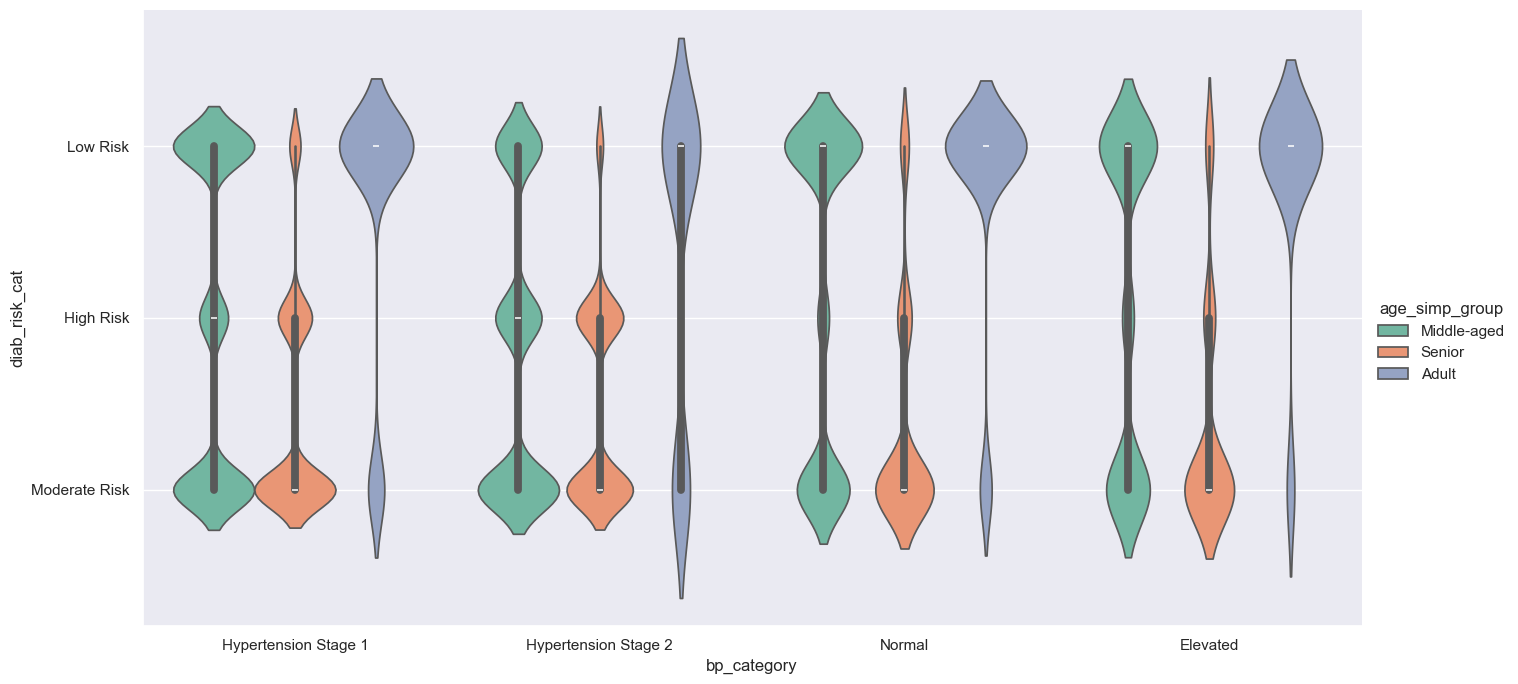

<Figure size 1700x700 with 0 Axes>

In [18]:
sns.catplot(data=df, x='bp_category', y='diab_risk_cat', hue='age_simp_group', kind='violin', height=7, aspect=2)
plt.figure(figsize=(17, 7))
plt.show()

**Key Insights**

***Normal & Elevated Blood Pressure:***

- Individuals with Normal BP are overwhelmingly at Low Risk of diabetes, regardless of age.
- Elevated BP still shows dominant Low Risk, but with slightly higher densities of Moderate and High Risk for Middle-aged and Seniors.

***Hypertension Stage 1 & 2:***

- As BP increases, risk distribution shifts from Low to Moderate and High Risk.
- This shift is most pronounced in Middle-aged and Senior groups, especially in Stage 2 Hypertension.

***Age as a Modifier:***

- Adults consistently show Low Risk, even under high BP categories.
- Middle-aged and Seniors are more vulnerable, showing higher densities in Moderate and High Risk categories as BP increases.

***Density Interpretation:***

- Wider violins = more people in that risk group.
- Low Risk remains most common, but older age + higher BP shifts the population visibly toward higher risk levels.

**Summarization**

- The visual analysis highlights a progressive increase in diabetes risk as blood pressure rises, particularly for older age groups.
- Adults (youngest group) remain at low diabetes risk across all BP categories.
- Middle-aged and Senior individuals show a dramatic risk increase in Hypertension Stage 1 and 2, with High Risk becoming significantly populated in Stage 2.

**Conclusion**

- High blood pressure alone does raise diabetes risk, but age significantly amplifies this effect.
- The findings strongly support age-specific interventions.
- Middle-aged and Senior adults with elevated BP should be prioritized for preventive screening and diabetes risk management.